# Initial Data Preparation

In [1]:
import numpy as np # import NumPy
import pandas as pd # import Pandas
import matplotlib.pyplot as plt # import Matplotlib
pd.options.display.max_rows = 800 # ensure max rows high enough to view all data (762 rows)
%matplotlib inline 

Libraries have imported to allow initial preparation of data.

In [2]:
df = pd.read_csv('Studentmentalhealth.csv',delimiter=',') # read data which is stored as a csv file into a dataframe, using pandas

In [3]:
df.head(5)

,pp number,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,...,Question 15,Question 16,Question 17,Question 18,Question 19,Question 20,Question 21,year,gender,age
0,1,2,0,2,2,2,2,2,2,1,...,1,1,3,0,3,0,3,2020,male,19
1,2,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,2020,female,19
2,3,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2020,female,19
3,4,1,2,1,0,1,1,0,1,0,...,1,1,0,1,0,0,0,2020,female,23
4,5,1,1,0,0,1,3,2,3,3,...,3,1,3,2,0,1,0,2020,female,18


We can also check how many rows and columns the entire dataframe contains using the 'shape' property:

In [4]:
df.shape[0] # check number of rows


762

In [5]:
df.shape[1] # check number of columns

25

The columns containing the survey responses are labelled 'Question 1-21'; however, for ease of future coding we can abbreviate the column headings using the 'columns' function:

In [6]:
df.columns = ['ppnumber','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Year','Gender','Age']

In [7]:
df.head(5) # view changes to column headings using 'head' function

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age
0,1,2,0,2,2,2,2,2,2,1,...,1,1,3,0,3,0,3,2020,male,19
1,2,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,2020,female,19
2,3,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,2020,female,19
3,4,1,2,1,0,1,1,0,1,0,...,1,1,0,1,0,0,0,2020,female,23
4,5,1,1,0,0,1,3,2,3,3,...,3,1,3,2,0,1,0,2020,female,18


Now we can check our data for any duplicate rows,using the duplicated function:

In [8]:
df[df.duplicated() == True] # looks for duplicates


,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age


No duplicates have been returned.

We should also check specifically for any duplicates in the ppnumber column.  This column is the only column which we would expect and require to have a unique value in every row.

In [9]:
df[df.ppnumber.duplicated() == True] # checks for duplicates in the pp number column

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age


Again, no duplicates are returned.

The next step in our data preparation is to check the data for any missing or invalid values.
First, we can check that all the participant numbers are populated:

In [10]:
df[df.ppnumber.isnull() == True] # checks for missing participant number

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age


From the above, we can see that there are no missing participant numbers.

Now we can check whether any of the question responses are missing:

In [11]:
# first, sum together the numerical question responses.  Any missing values will return NaN for the sum of that row.
df_sum = df['Q1']+df['Q2']+df['Q3']+df['Q4']+df['Q5']+df['Q6']+df['Q7']+df['Q8']+df['Q9']+df['Q10']+df['Q11']+df['Q12']+df['Q13']+df['Q14']+df['Q15']+df['Q16']+df['Q17']+df['Q18']+df['Q19']+df['Q20']+df['Q21']

# return any rows where df_sum is NaN
df_sum[df_sum.isnull() == True]

Series([], dtype: int64)

No rows have been returned; therefore we know that all questions have numerical responses for each participant.
We also need to check that each response is valid - they all should be a number between 0 and 3.

In [13]:
# first, create a new dataframe which returns a boolean value for each question response - 
# true if the response is greater than 3, false if it is not greater than 3

df_valid = pd.DataFrame({'Q1':(df['Q1'] > 3) | (df['Q1'] < 0), 'Q2':(df['Q2'] > 3) | (df['Q2'] < 0),'Q3':(df['Q3'] > 3) | (df['Q3'] < 0),
                         'Q4':(df['Q4'] > 3) | (df['Q4'] < 0),'Q5':(df['Q5'] > 3) | (df['Q5'] < 0), 'Q6':(df['Q6'] > 3) | (df['Q6'] < 0),
                         'Q7':(df['Q7'] > 3) | (df['Q7'] < 0),'Q8':(df['Q8'] > 3) | (df['Q8'] < 0),'Q9':(df['Q9'] > 3) | (df['Q9'] < 0),
                         'Q10':(df['Q10'] > 3) | (df['Q10'] < 0),'Q11':(df['Q11'] > 3) | (df['Q11'] < 0),'Q12':(df['Q12'] > 3) | (df['Q12'] < 0),
                         'Q13':(df['Q13'] > 3) | (df['Q13'] < 0),'Q14':(df['Q14'] > 3) | (df['Q14'] < 0),'Q15':(df['Q15'] > 3) | (df['Q15'] < 0),
                        'Q16':(df['Q16'] > 3) | (df['Q16'] < 0),'Q17':(df['Q17'] > 3) | (df['Q17'] < 0),'Q18':(df['Q18'] > 3) | (df['Q18'] < 0),
                         'Q19':(df['Q19'] > 3) | (df['Q19'] < 0),'Q20':(df['Q20'] > 3) | (df['Q20'] < 0),'Q21':(df['Q21'] > 3) | (df['Q21'] < 0)})

# next we sum the values in each row - as true is equivalent to 1, and false is equivalent to 0, any row which contains 
# a value greater than 1 must contain an invalid response.

df_valid_sum = df_valid.sum(0)
df_valid_sum


Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    1
Q20    0
Q21    0
dtype: int64

From the above we can see that one response to Q19 has an invalid response.  Now we can return that row to obtain the index location of the invalid response:

In [14]:
df_valid[df_valid.Q19 == True] # returns row with invalid response


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Now we know the location of the invalid response we can return the invalid value at that location in the original dataframe.

In [15]:
df.iloc[641,19] # returns data from row 641, Q19 (19 is the index location of the column containting the responses to Q19 - it's coincidental that they are both 19!)

11

Given that our valid responses are 0 - 3, I am going to assume that this response (11) is a typo, and will replace it with 1 using the replace function:

In [16]:
df.iloc[642,19] = 1 # replace value at the given location with 1
df.iloc[642] # retrieve row to check the change

ppnumber       643
Q1               1
Q2               0
Q3               2
Q4               0
Q5               1
Q6               2
Q7               0
Q8               1
Q9               2
Q10              1
Q11              1
Q12              1
Q13              1
Q14              1
Q15              1
Q16              1
Q17              1
Q18              1
Q19              1
Q20              0
Q21              1
Year          2017
Gender      female
Age             20
Name: 642, dtype: object

Now we can check the Year, Gender, and Age columns for missing values:

In [17]:
df[df.Year.isnull() == True] # checks for missing Years

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age


There are no missing Years.  We should also check that all values in the 'Years' are valid by inspecting the unique values in that column, using the unique function:

In [18]:
df.Year.unique() # returns unique values in Year column

array([2020, 2019, 2018, 2017], dtype=int64)

All values are valid years.

In [19]:
df[df.Gender.isnull() == True] # checks for missing Genders

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age
179,180,1,0,1,2,3,1,1,1,2,...,1,1,1,1,0,0,1,2020,NaN,18
485,486,1,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,2,2020,NaN,20
673,674,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2017,NaN,20
674,675,2,1,1,0,1,1,1,1,0,...,0,1,0,1,0,0,0,2017,NaN,18
675,676,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,2017,NaN,18
676,677,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,2017,NaN,20
677,678,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,2017,NaN,19
678,679,1,0,0,0,1,1,0,2,1,...,0,0,0,0,0,0,0,2017,NaN,20
679,680,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2017,NaN,19
680,681,0,0,1,1,3,2,0,2,1,...,1,1,1,2,1,1,1,2017,NaN,19


91 rows have missing values in the Gender column.  We can also check the unique values in the Gender column:

In [20]:
df.Gender.unique() # returns unique values in Gender column

array(['male', 'female', 'Other', nan], dtype=object)

Here we can see that 'Other' has been included as a response, as well as 'male' and 'female'.  For now, we will leave the NaN responses rather than replacing them with another value, but will need to deal with this when analysing the data further.  We will also convert 'Other' to 'other' for consistency with 'male' and 'female', using the replace() function:

In [21]:
df.Gender.replace('Other','other',inplace=True) # replace 'Other' with 'other'

print(df.Gender.unique()) # view results

['male' 'female' 'other' nan]


In [22]:
df[df.Age.isnull() == True] # checks for missing Ages

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age


There are no missing values in the Age column.  
Now we can inspect the unique values in the Age column:

In [23]:
df.Age.unique()

array([19, 23, 18, 20, 22, 21, 25, 27, 24, 29, 17,  0], dtype=int64)

We can see that '0' is one of the values. This is not likely to be the age of any of the respondents, and leaving this as a numerical value is likely to cause issues in the analysis; therefore we should replace '0' with NaN, using the 'replace' function:

In [24]:
df.Age.replace(0,np.nan,inplace=True) # replace 0 with NaN in the Age column.

Now we can check again for missing values in the Age column:

In [25]:
df[df.Age.isnull() == True] # checks for missing Ages

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Year,Gender,Age
474,475,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2020,female,NaN


This time, 1 row is returned.

# Exploratory Data Analysis

Now that we have prepared our data, we can carry out some initial analysis to find out more about the data we have.
First, we can see how many responses we have in each category (Year, Gender and Age).

In [26]:
year_count = df.groupby('Year')['ppnumber'].count() # count how many participants fall under each year
df_year_count = year_count.to_frame() # convert to dataframe
year_count # display count by year


Year
2017    147
2018     33
2019     81
2020    501
Name: ppnumber, dtype: int64

In [27]:
age_count = df.groupby('Age')['ppnumber'].count() # count how many participants fall under each age
df_age_count = age_count.to_frame() # convert to dataframe
df_age_count # display count by age

,ppnumber
Age,
17.0,1
18.0,229
19.0,344
20.0,136
21.0,32
22.0,10
23.0,2
24.0,3
25.0,1


In [28]:
gender_count = df.groupby('Gender')['ppnumber'].count() # count how many participants fall under each gender
df_gender_count = gender_count.to_frame() # convert to dataframe
df_gender_count # display count by gender

,ppnumber
Gender,
female,572
male,98
other,1


Note that the NaN results are not included in the Gender counts, so there are fewer overall results.

We can also return counts by multiply categories:

In [29]:
age_gender_count = df.groupby(['Age','Gender'])['ppnumber'].count() # count how many participants fall under each age and gender
df_age_gender_count = age_gender_count.to_frame() # convert to dataframe
df_age_gender_count # display count by age and gender

ppnumber
Age  Gender          
17.0 female         1
18.0 female       186
     male          25
19.0 female       254
     male          44
     other          1
20.0 female        96
     male          18
21.0 female        22
     male           5
22.0 female         6
     male           3
23.0 female         2
24.0 female         2
     male           1
25.0 male           1
27.0 female         2
29.0 male           1

In [30]:
age_year_count = df.groupby(['Age','Year'])['ppnumber'].count() # count how many participants fall under each age and year
df_age_year_count = age_year_count.to_frame() # convert to dataframe
df_age_year_count # display count by age and year 

ppnumber
Age  Year          
17.0 2020         1
18.0 2017        34
     2018        12
     2019        16
     2020       167
19.0 2017        73
     2018        13
     2019        33
     2020       225
20.0 2017        32
     2018         4
     2019        22
     2020        78
21.0 2017         6
     2018         1
     2019         8
     2020        17
22.0 2017         2
     2018         3
     2019         1
     2020         4
23.0 2019         1
     2020         1
24.0 2020         3
25.0 2020         1
27.0 2020         2
29.0 2020         1

In [31]:
gender_year_count = df.groupby(['Gender','Year'])['ppnumber'].count() # count how many participants fall under each gender and year
df_gender_year_count = gender_year_count.to_frame() # convert to dataframe
df_gender_year_count # display count by gender and year 

ppnumber
Gender Year          
female 2017        52
       2018        27
       2019        63
       2020       430
male   2017         6
       2018         6
       2019        18
       2020        68
other  2020         1

In [32]:
year_gender_age_count = df.groupby(['Year', 'Gender','Age'])['ppnumber'].count() # count how many participants fall under each year, gender and age
df_year_gender_age_count = year_gender_age_count.to_frame() # convert to dataframe
df_year_gender_age_count

ppnumber
Year Gender Age           
2017 female 18.0        16
            19.0        25
            20.0         9
            21.0         1
            22.0         1
     male   18.0         1
            19.0         3
            20.0         2
2018 female 18.0        11
            19.0         9
            20.0         4
            21.0         1
            22.0         2
     male   18.0         1
            19.0         4
            22.0         1
2019 female 18.0        10
            19.0        25
            20.0        21
            21.0         6
            23.0         1
     male   18.0         6
            19.0         8
            20.0         1
            21.0         2
            22.0         1
2020 female 17.0         1
            18.0       149
            19.0       195
            20.0        62
            21.0        14
            22.0         3
            23.0         1
            24.0         2
            27.0         2
     male   18.0        17
            19.0        29
            20.0        15
            21.0         3
            22.0         1
            24.0         1
            25.0         1
            29.0         1
     other  19.0         1

In order to carry out further data analaysis, it is necessary to calculate a total DASS score for each participant by summing their individual question responses, and a total for each of the three categories (depression, anxiety and stress).  We can do this by adding additional columns to the dataframe using the following code:

In [33]:
df_questions = list(df) # create a list of columns in the dataframe
df_questions.remove('ppnumber') # remove the columns which do not contain question responses 
df_questions.remove('Year')
df_questions.remove('Gender')
df_questions.remove('Age')

# df_questions is now a list of all the columns containing responses

df['Total'] = 0 # if this kernel is run multiple times, the total will keep incrementing on top of the previous value, so it is worth resetting the total to 0 before performing the sum.


df['Total'] = df[df_questions].sum(axis=1) # create a new column 'total' in the dataframe, which sums the values in each column in the 'questions' list


df = df[['ppnumber','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Total','Year','Gender','Age']] # reorder the columns for neatness

df.head(5) # display new dataframe

,ppnumber,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q16,Q17,Q18,Q19,Q20,Q21,Total,Year,Gender,Age
0,1,2,0,2,2,2,2,2,2,1,...,1,3,0,3,0,3,34,2020,male,19.0
1,2,1,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,9,2020,female,19.0
2,3,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,6,2020,female,19.0
3,4,1,2,1,0,1,1,0,1,0,...,1,0,1,0,0,0,13,2020,female,23.0
4,5,1,1,0,0,1,3,2,3,3,...,1,3,2,0,1,0,31,2020,female,18.0


We can now analyse the 'Total' column in more detail.  A good starting point is by using the describe function, which will show basic statistics about the total scores (mean, standard deviation, minimum value, maximum value, and quartiles):

In [34]:
df.Total.describe()


count    762.000000
mean      15.765092
std       11.362094
min        0.000000
25%        7.000000
50%       13.000000
75%       22.000000
max       55.000000
Name: Total, dtype: float64

The 'describe' function can also be used in combination with 'groupby' to show these statistics by Year, Gender or Age:


In [35]:
df.groupby(['Year'])['Total'].describe() # Total score statistics split by Year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,147.0,14.795918,11.288216,0.0,7.0,12.0,20.0,53.0
2018,33.0,11.424242,12.577337,0.0,3.0,8.0,20.0,55.0
2019,81.0,12.975309,9.621558,1.0,7.0,10.0,16.0,49.0
2020,501.0,16.786427,11.424373,0.0,8.0,14.0,24.0,53.0


In [36]:
df.groupby(['Gender'])['Total'].describe() # Total score statistics split Gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,572.0,16.309441,11.429999,0.0,7.00,14.0,23.0,55.0
male,98.0,15.020408,11.706884,0.0,6.25,11.5,22.0,50.0
other,1.0,44.000000,NaN,44.0,44.00,44.0,44.0,44.0


In [37]:
df.groupby(['Age'])['Total'].describe() # Total score statistics split Age

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
17.0,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0
18.0,229.0,14.720524,10.912353,0.0,6.00,13.0,21.00,55.0
19.0,344.0,16.366279,11.382541,0.0,7.00,13.0,23.00,53.0
20.0,136.0,16.397059,11.765788,0.0,8.00,13.5,24.00,52.0
21.0,32.0,16.156250,12.446296,0.0,6.00,15.0,22.00,49.0
22.0,10.0,13.000000,8.894443,0.0,9.50,11.5,15.75,31.0
23.0,2.0,16.000000,4.242641,13.0,14.50,16.0,17.50,19.0
24.0,3.0,5.666667,6.429101,1.0,2.00,3.0,8.00,13.0
25.0,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


I also wanted to analyse whether there was an increase in scores greater than 30 in 2020, or if gender or age contributed to a score of over 30.  I created a new dataframe which included a boolean value of True where the Total was greater than 30:

In [38]:
df_depressed = pd.DataFrame({'ppnumber':df['ppnumber'],'Year':df['Year'],'Gender':df['Gender'],'Age':df['Age'],'Total':df['Total'],'DASS':(df['Total'] >= 30)})
df_depressed.head(5) # display dataframe

,ppnumber,Year,Gender,Age,Total,DASS
0,1,2020,male,19.0,34,True
1,2,2020,female,19.0,9,False
2,3,2020,female,19.0,6,False
3,4,2020,female,23.0,13,False
4,5,2020,female,18.0,31,True


In [39]:
pd.pivot_table(df_depressed, index=['Year'])['DASS'] # pivot the dataframe to show the proportion of 'True' Dass values by Year

Year
2017    0.136054
2018    0.090909
2019    0.086420
2020    0.163673
Name: DASS, dtype: float64

In [40]:
pd.pivot_table(df_depressed, index=['Gender'])['DASS'] # pivot the dataframe to show the proportion of 'True' Dass values by Gender

Gender
female    0.155594
male      0.142857
other     1.000000
Name: DASS, dtype: float64

In [41]:
pd.pivot_table(df_depressed, index=['Age'])['DASS'] # pivot the dataframe to show the proportion of 'True' Dass values by Age

Age
17.0    0.000000
18.0    0.109170
19.0    0.168605
20.0    0.161765
21.0    0.156250
22.0    0.100000
23.0    0.000000
24.0    0.000000
25.0    0.000000
27.0    0.000000
29.0    1.000000
Name: DASS, dtype: float64

# Data Visualisation

Now we can use matplotlib to visualise our data, in order to gain greater understanding.  We will begin with some straightforward analysis of our population.

First lets look at the overall split by gender:

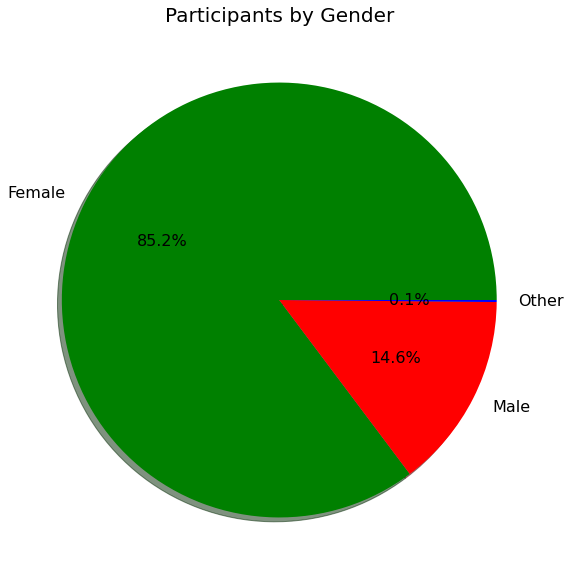

In [42]:

fig, ax = plt.subplots(figsize=(20,10))

ax.pie(gender_count,labels=('Female','Male','Other'),autopct='%1.1f%%',colors=('Green','Red','Blue'),textprops={'fontsize':16},shadow=True) # plot pie chart based on gender_count (defined previously) using matplotlib
ax.set_title('Participants by Gender', fontsize=20) # define a title for the chart

plt.show() # show chart

Now we can look at the split of participants across the four years:

<ipython-input-43-848cd30bec46>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','2017','','2018','','2019','','2020'])


[Text(2016.5, 0, ''),
 Text(2017.0, 0, '2017'),
 Text(2017.5, 0, ''),
 Text(2018.0, 0, '2018'),
 Text(2018.5, 0, ''),
 Text(2019.0, 0, '2019'),
 Text(2019.5, 0, ''),
 Text(2020.0, 0, '2020'),
 Text(2020.5, 0, '')]

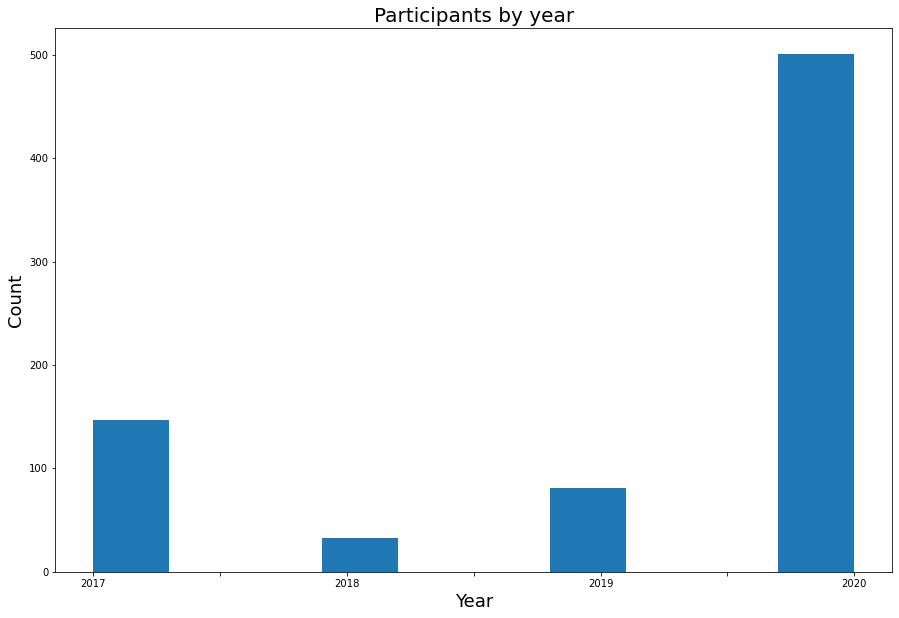

In [43]:
years =  df.Year.to_list() # convert years column in data frame to a list

fig, ax = plt.subplots(figsize=(15,10))

ax.hist(years)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Participants by year',fontsize=20)
ax.set_xticklabels(['','2017','','2018','','2019','','2020'])


In [44]:
year_gender_count = df.groupby(['Year','Gender'])['ppnumber'].count()  # count how many participants fall under each gender and year
df_year_gender_count = year_gender_count.to_frame() # convert series to dataframe 

df_year_gender = pd.pivot_table(df_year_gender_count, index=['Year'],columns=['Gender'], aggfunc=sum, fill_value=0) # pivot table
df_year_gender


ppnumber           
Gender   female male other
Year                      
2017         52    6     0
2018         27    6     0
2019         63   18     0
2020        430   68     1

In [45]:
df_year_gender = pd.DataFrame(df_year_gender.values,index=['2017','2018','2019','2020'],columns=['female','male','other'])
df_year_gender

,female,male,other
2017,52,6,0
2018,27,6,0
2019,63,18,0
2020,430,68,1


I'm now going to look at the population distribution by age and year:

AxesSubplot(0.125,0.125;0.775x0.755)


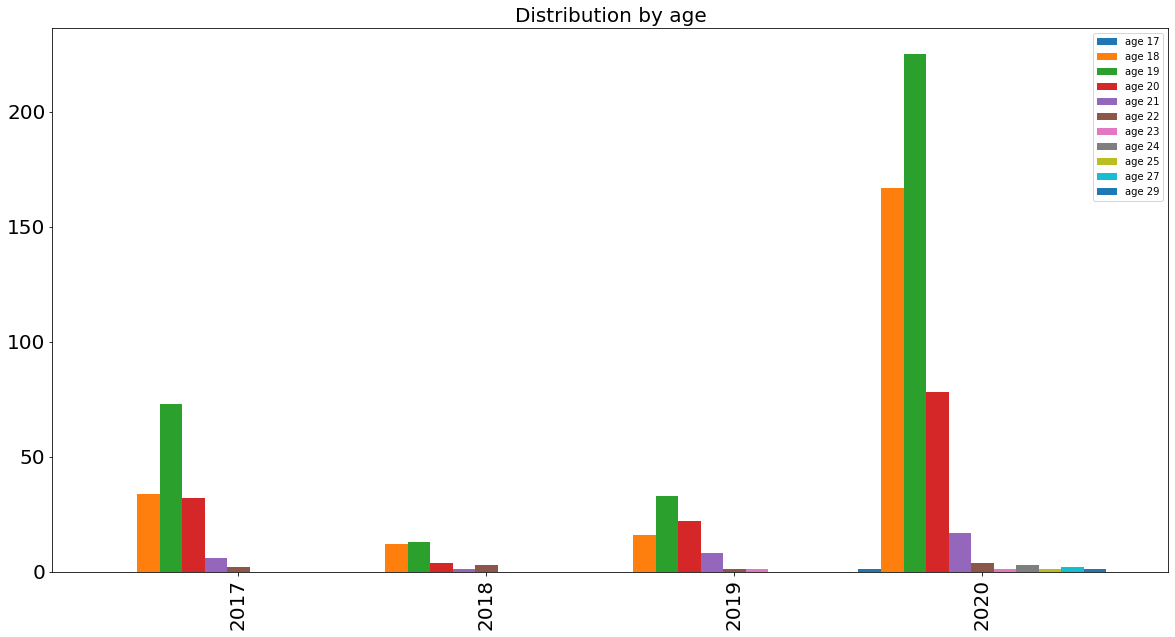

In [46]:


year_age_count = df.groupby(['Year','Age'])['ppnumber'].count()  # count how many participants fall under each age and year
df_year_age_count = year_age_count.to_frame() # convert groupby to new dataframe 

df_year_age = pd.pivot_table(df_year_age_count, index=['Year'],columns=['Age'], aggfunc=sum, fill_value=0) # pivot table

df_year_age = pd.DataFrame(df_year_age.values,index=['2017','2018','2019','2020'],columns=['age 17','age 18','age 19','age 20','age 21','age 22','age 23','age 24','age 25','age 27','age 29'])


ax = df_year_age.plot(kind='bar', title="",  width=1, figsize=(20,10),fontsize=20)
ax.set_title('Distribution by age',fontsize=20)
print(ax)

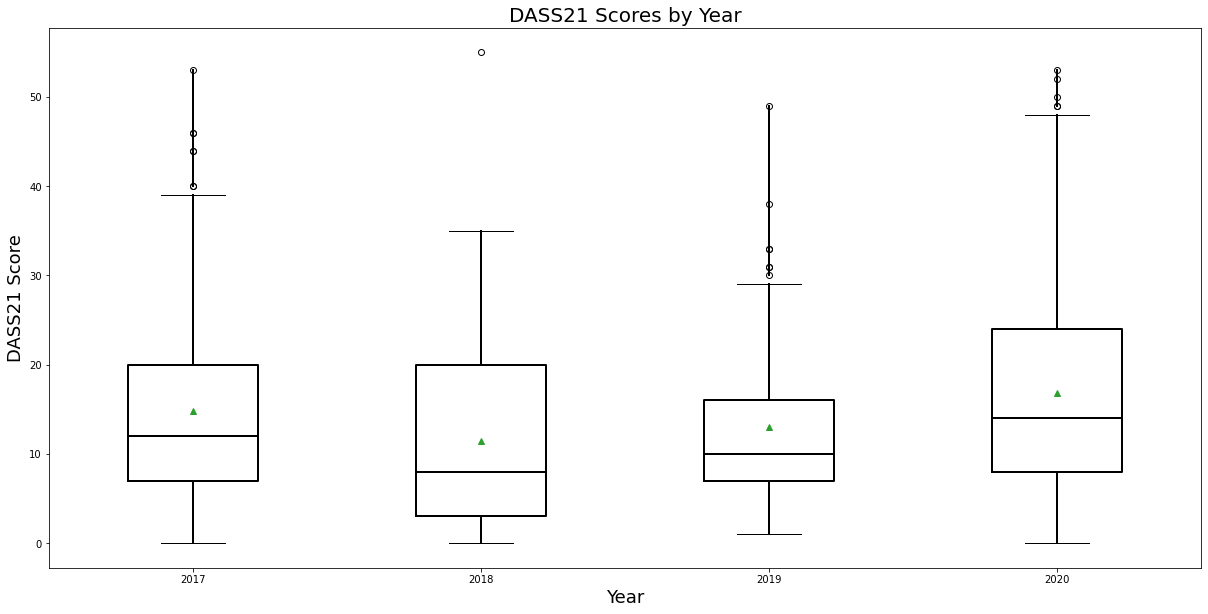

In [47]:
# drop queston responses, ppnumber, Gender and Age, to produce a dataframe containing, Total DASS scores and Year only

df_total_year = df.drop(['ppnumber','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Gender','Age'], axis=1)

# Define properties for lines in the box plot

boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='k')
whiskerprops = dict(linestyle='-', linewidth=2, color='k')
meanprops = dict(linestyle='-', linewidth=2, color='k')
flierprops = dict(linestyle='-', linewidth=2, color='k')
meanline = dict(linestyle='-', linewidth=1, color='k')

# Plot boxplot based on df_total_year

ax = df_total_year.boxplot(by='Year',grid=False,figsize=(20,10),showmeans=True,boxprops=boxprops,flierprops=flierprops,meanprops=meanprops,medianprops=medianprops,whiskerprops=whiskerprops)
plt.suptitle('')
plt.title('DASS21 Scores by Year', fontsize='20')
plt.ylabel('DASS21 Score',fontsize=18)
plt.xlabel('Year',fontsize=18)

plt.show()



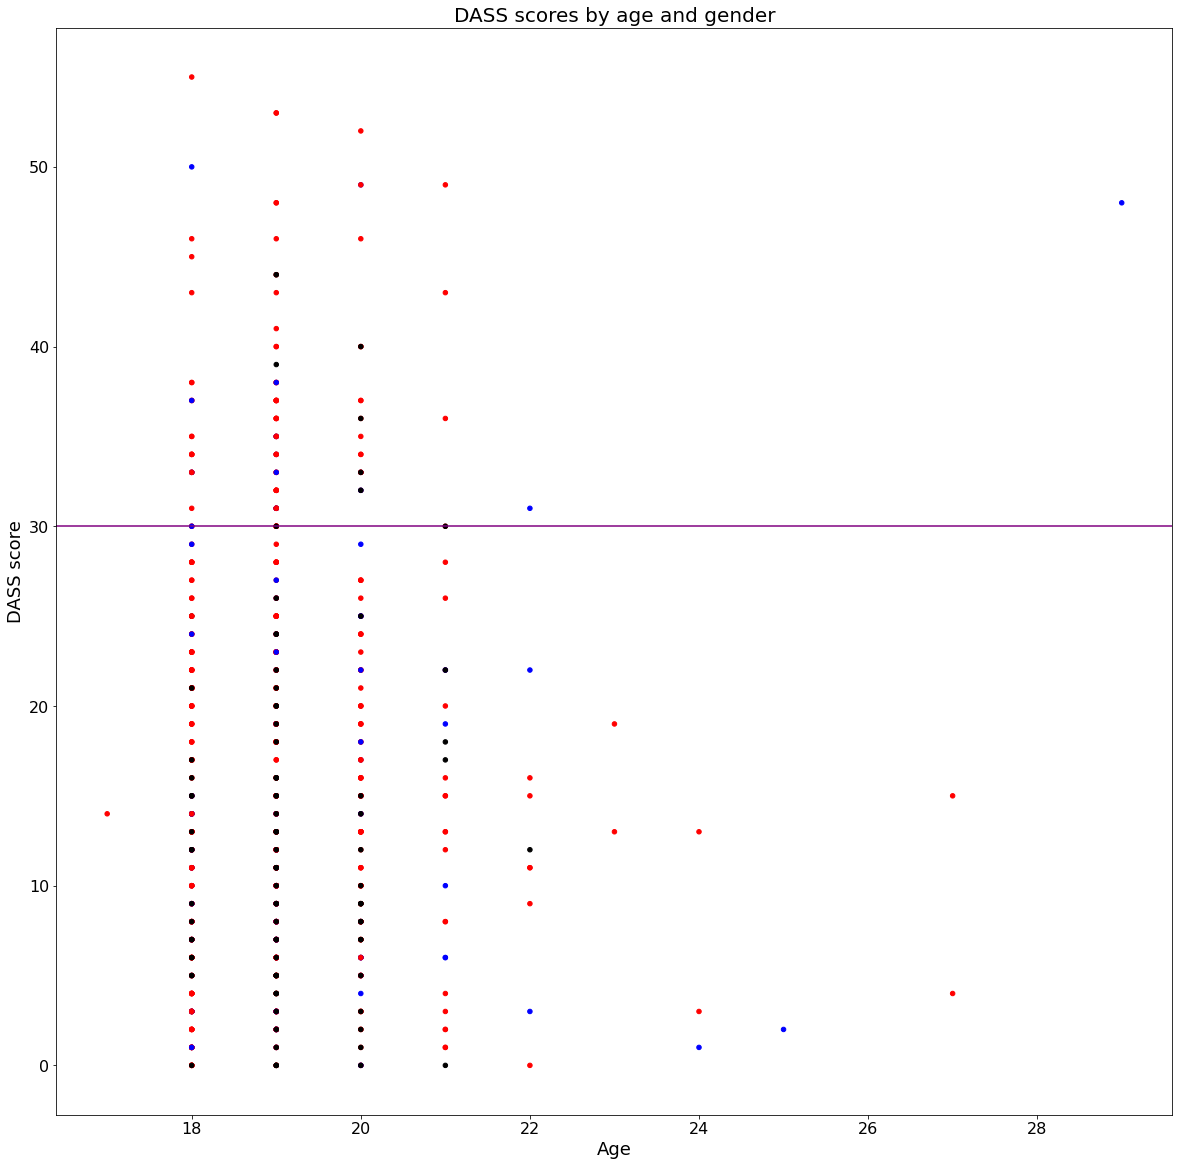

In [76]:
# Replace genders with colours in order to display gender as ifferent coloured dots on the scatter chart

df_depressed.Gender.replace('male','Blue',inplace=True)
df_depressed.Gender.replace('female','Red',inplace=True)
df_depressed.Gender.replace('other','Black',inplace=True)
df_depressed.Gender.replace(np.nan,'Black',inplace=True)

#plot scatter based on df_depressed dataframe

ax= df_depressed.plot.scatter(x='Age',y='Total',c='Gender',title='Depression scores by age and Gender',fontsize=16,figsize=(20,20))
ax.set_title('DASS scores by age and gender',fontsize=20)
ax.set_xlabel('Age',fontsize=18)
ax.set_ylabel('DASS score',fontsize=18)
plt.axhline(y=30, color='Purple', linestyle='-')

# Modelling

# Logistic Regression

In [78]:
# import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# prepare dataframe by dropping individual responses and gender
df_total = df.drop(['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21'], axis=1)

df_total = df_total.dropna(subset=['Age']) # drop record where age is not provided
                   
df_total = pd.get_dummies(df_total) # converts categorical variable (gender) into numerical values across three columns for use in the model

df_total.loc[(df_total.Total) < 30,'Total'] = 0 # convert total into binary numerical options (0 is DASS score below 30, 1 is DASS above 30)
df_total.loc[(df_total.Total) >= 30,'Total'] = 1

y = np.array(df_total['Total']) # one dimensional array for the dependent variable (DASS score binary value)
x = np.array(df_total.drop('Total', axis = 1)) # multidimensional array of the independent variables (Age, Gender, Year)
x = x[:,1:] # removes the index column 

xtrain,xtest,ytrain,ytest  = train_test_split(x,y,random_state=0) # function for splitting the data into test and training data


clf = LogisticRegression() # creates the model
clf.fit(xtrain,ytrain) # trains the mdoel using the training data (defined by the train_test_split method above)
ypred_train = clf.predict(xtrain) # predictions of y (DASS score) based on training set values of x
ypred_test = clf.predict(xtest) # predictions of y (DASS score) based on test set values of x


print(len(ytrain)) # view the size of the training set
print(np.count_nonzero(ytrain)) # vew the number of students in the trainig set with DASS scores above 30

570
87


In [80]:
confusion_matrix(y, clf.predict(x)) # view confusion matrix

array([[649,   0],
       [112,   0]], dtype=int64)

In [56]:
clf.predict(x) # view set of predicted values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
clf.predict_proba(x) # view probabilities for each item

array([[0.84743991, 0.15256009],
       [0.84743991, 0.15256009],
       [0.84743991, 0.15256009],
       ...,
       [0.84710939, 0.15289061],
       [0.84711042, 0.15288958],
       [0.84711042, 0.15288958]])

In [59]:
clf.score(x,y) # view accuracy score

0.8528252299605782

In [60]:
print(classification_report(y, clf.predict(x), zero_division="warn")) # view classifiation report

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       649
           1       0.00      0.00      0.00       112

    accuracy                           0.85       761
   macro avg       0.43      0.50      0.46       761
weighted avg       0.73      0.85      0.79       761



C:\Users\truff\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


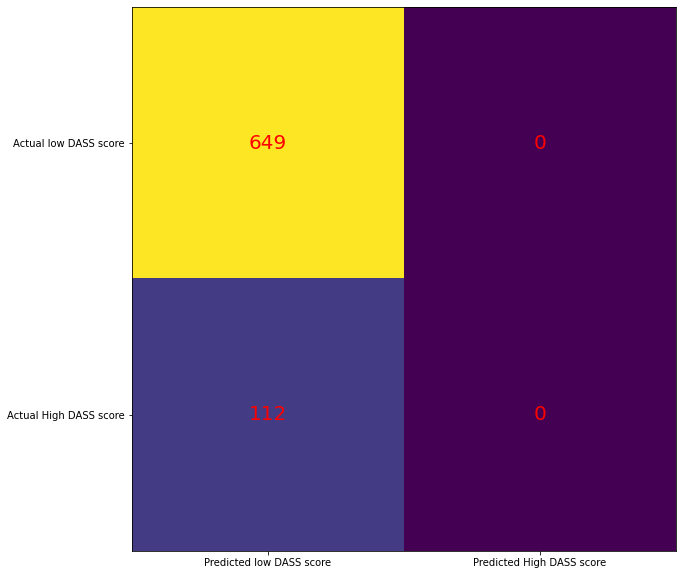

In [89]:
# produce a heat map of the confusion matrix

matrix = confusion_matrix(y, clf.predict(x))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted low DASS score', 'Predicted High DASS score'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual low DASS score', 'Actual High DASS score'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=20)
                       
plt.show()

# KNN Model


In [100]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# prepare dataframe by dropping individual responses and gender

df_total = df.drop(['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Gender'], axis=1)

df_total = df_total.dropna(subset=['Age']) # drop record where age is not provided
                   
df_total = pd.get_dummies(df_total)    # converts categorical variable (gender) into numerical values across three columns for use in the model 

df_total.loc[(df_total.Total) < 30,'Total'] = 0 # convert total into binary numerical options (0 is DASS score below 30, 1 is DASS above 30)
df_total.loc[(df_total.Total) >= 30,'Total'] = 1

y = np.array(df_total['Total']) #one dimensional array for the dependent variable (DASS score binary)
x = np.array(df_total.drop('Total', axis = 1)) # multidimensional array of the independent variables
x = x[:,1:] # remove 

xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.2) # function for splitting the data into test and training data



clf = KNeighborsClassifier() # create model
clf.fit(xtrain, ytrain) #train model

KNeighborsClassifier()

In [102]:
ypred_test = clf.predict(xtest)
ypred_train = clf.predict(xtrain)

ypred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [65]:
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test, zero_division="warn"))

[[130   0]
 [ 23   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       130
           1       0.00      0.00      0.00        23

    accuracy                           0.85       153
   macro avg       0.42      0.50      0.46       153
weighted avg       0.72      0.85      0.78       153



C:\Users\truff\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


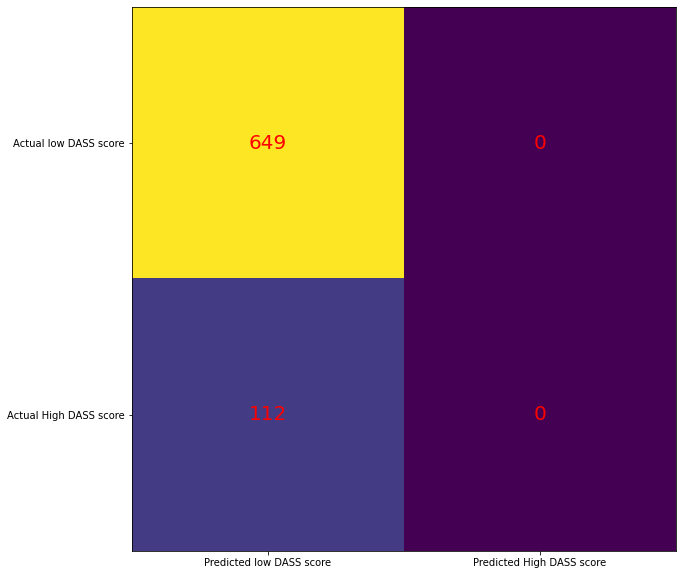

In [105]:
# produce a heat map of the confusion matrix

matrix = confusion_matrix(y, clf.predict(x))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted low DASS score', 'Predicted High DASS score'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual low DASS score', 'Actual High DASS score'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=20)
                       
plt.show()